In [3]:
path='pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'

In [4]:
#读到了第一个花括号的终止
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
import json
records=[json.loads(line) for line in open(path)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
records[0]['al']

u'en-US,en;q=0.8'

In [8]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]

In [9]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [16]:
counts=get_counts(time_zones)
counts['America/New_York']

1251

In [20]:
def top_counts(count_dict,n=10):
    value_key_pairs=[(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()     #此时是用count排序
    return value_key_pairs[-n:]

In [21]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [51]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [26]:
import pandas as pd
import numpy as np
frame=pd.DataFrame(records)   #将字典转化为dataframe
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [27]:
tz_count=frame['tz'].value_counts()   #对tz里的项目计数

In [28]:
tz_count[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [52]:
clean_tz=frame['tz'].fillna('Missing')   #将原来的缺失值NaN替换成Missing
clean_tz[clean_tz=='']='Unknown'     #clean_tz可以直接访问并判断  clean_tz==''. 
#此处''表明填入字符为空格，而什么都没有的则标记为NaN
tz_count=clean_tz.value_counts()
s=tz_count[:10]
s   #s是dataframe

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [57]:
%matplotlib notebook
import matplotlib as plt   #一定要导入matplotlib

<IPython.core.display.Javascript object>


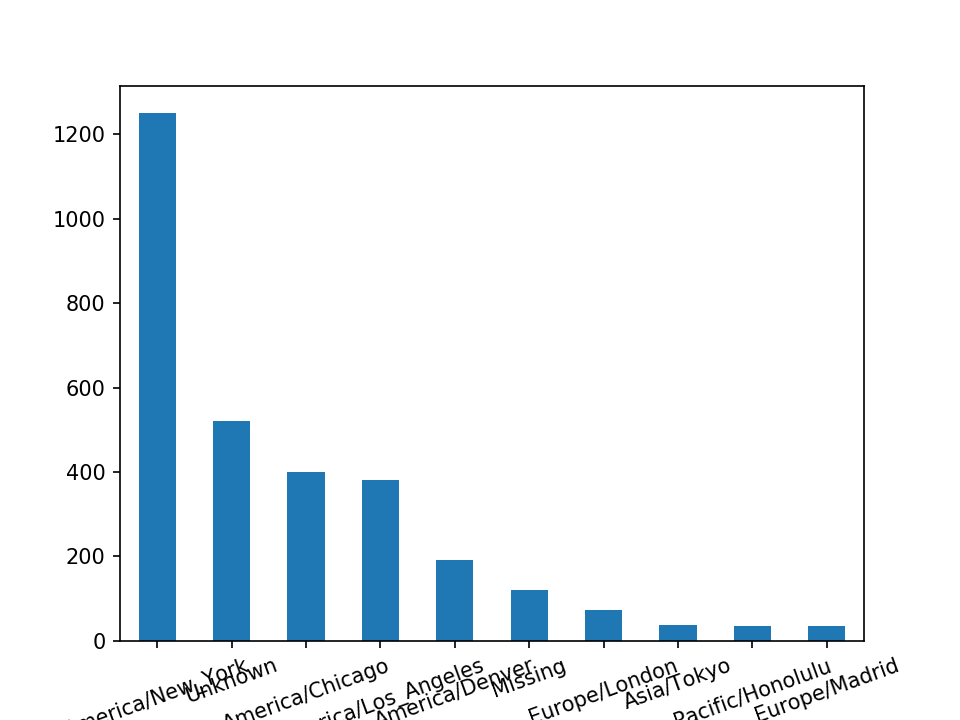

In [65]:
s.plot(kind='bar',rot=20)   #kind可选择bar和barh

In [71]:
results=pd.Series([x.split()[0] for x in frame['a'].dropna()])

In [72]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [69]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [70]:
cframe=frame[frame.a.notnull()]

In [74]:
operating_system=np.where(cframe['a'].str.contains('Windows'),'Windows','not Windows') #数据类型变为了array

In [75]:
operating_system[:5]

array(['Windows', 'not Windows', 'Windows', 'not Windows', 'Windows'],
      dtype='|S11')

In [76]:
by_tz_os=cframe.groupby(['tz',operating_system])

In [79]:
agg_counts=by_tz_os.size().unstack().fillna(0)

In [80]:
agg_counts[:10]

,Windows,not Windows
tz,,
,276.0,245.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,1.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [81]:
indexer=agg_counts.sum(1).argsort()   #排序结果为原序列中的序号，序号所对应的数遵从从小到大的排列

In [97]:
agg_counts.take(indexer).head()

,Windows,not Windows
tz,,
America/Mazatlan,0.0,1.0
America/La_Paz,1.0,0.0
America/Lima,1.0,0.0
Europe/Volgograd,1.0,0.0
Europe/Sofia,1.0,0.0


In [91]:
count_subset=agg_counts.take(indexer)[-10:]   #take(indexer)为标准表达
count_subset

,Windows,not Windows
tz,,
America/Sao_Paulo,20.0,13.0
Europe/Madrid,19.0,16.0
Pacific/Honolulu,36.0,0.0
Asia/Tokyo,35.0,2.0
Europe/London,31.0,43.0
America/Denver,59.0,132.0
America/Los_Angeles,252.0,130.0
America/Chicago,285.0,115.0
,276.0,245.0


In [89]:
np.argsort?   #查询的标准表达

In [8]:
import pandas as pd
unames=['user_id','gender','age','occupation','zip']
users=pd.read_table('pydata-book-2nd-edition/datasets/movielens/users.dat',sep='::',header=None,names=unames)
rnames=['user_id','movie_id','rating','timestamp']
ratings=pd.read_table('pydata-book-2nd-edition/datasets/movielens/ratings.dat',sep='::',header=None,names=rnames)
mnames=['movie_id','title','genres']
movies=pd.read_table('pydata-book-2nd-edition/datasets/movielens/movies.dat',sep='::',header=None,names=mnames)

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engin

In [7]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
data=pd.merge(pd.merge(users,ratings),movies)

In [15]:
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [49]:
mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [30]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [32]:
pd.pivot_table?

In [33]:
ratings_by_title=data.groupby('title').size()

In [35]:
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [52]:
#至关重要的数据清洗
#active_titles=ratings_by_title[ratings_by_title>=250]
active_titles=ratings_by_title.index[ratings_by_title>=250]   #这样得到的是索引，即电影名称，不再显示各电影的评论数

In [41]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [53]:
mean_ratings=mean_ratings.loc[active_titles]

In [54]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [55]:
top_female_ratings=mean_ratings.sort_index(by='F',ascending=False)

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [59]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [60]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']

In [61]:
sorted_by_diff=mean_ratings.sort_index(by='diff')

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [62]:
sorted_by_diff[::-1][:15]    #对排序结果反序并取出前15行

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [67]:
rating_std_by_title=data.groupby('title')['rating'].std()

In [68]:
rating_std_by_title=rating_std_by_title.loc[active_titles]

In [78]:
rating_std_by_title.sort_index(ascending=False)[:5]

title
eXistenZ (1999)                 1.178568
Zero Effect (1998)              1.042932
Young Sherlock Holmes (1985)    0.891176
Young Guns II (1990)            1.071959
Young Guns (1988)               1.017437
Name: rating, dtype: float64

In [95]:
s=movies['genres'].str.split('|')

In [96]:
s.head()   #分解得到的是list

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [94]:
movies['genres'].str.contains('Animation').head()

0     True
1    False
2    False
3    False
4    False
Name: genres, dtype: bool